In [4]:
# DA ESEGUIRE

dati1=creadf('C:\\Users\\user\\Downloads\\New-BOLO-01\\2017-01-02\\BOLO-01-2017-01-02-00001_dst.root.csv')
dati2=creadf('C:\\Users\\user\\Downloads\\New-BOLO-02\\2017-01-02\\BOLO-02-2017-01-02-00001_dst.root.csv')
dati3=creadf('C:\\Users\\user\\Downloads\\New-BOLO-03\\2017-01-02\\BOLO-03-2017-01-02-00001_dst.root.csv')
dati4=creadf('C:\\Users\\user\\Downloads\\New-BOLO-04\\2017-01-02\\BOLO-04-2017-01-02-00001_dst.root.csv')


In [ ]:
%%time
# QUESTA è QUELLA GENERALE 
#Raccolta dati per la frequenza, pressione e tempo

frequenza = []
ora = []
dtesposizione = []
pressione = [] 
pathg = 'C:\\Users\\user\\Downloads\\New-BOLO-0%d\\2017-01-%02d\\BOLO-0%d-2017-01-%02d-%05d_dst.root.csv'

a = [1, 2, 3, 4, 5, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 20, 22]
b = [7, 35, 33, 52, 35, 46, 76, 38, 31, 52, 38, 30, 50, 84, 55, 83, 60]
c = [0, 17, 6, 15, 0, 0, 0, 0, 0, 0, 15, 26, [3, 16], 0, 12, 0, 11]
    
    
for j,x in enumerate(a):
    for i in xrange(1, b[j]):
        if (x == 2 and i != c[j]) or (x == 3 and i != c[j]) or (x == 4 and i != c[j]) or \
        (x == 14 and i != c[j]) or (x == 15 and i != c[j]) or (x == 16 and i not in c[j]) or \
        (x == 18 and i != c[j]) or (x == 22 and i != c[j]): 
            fpath = pathg % (1, x, 1, x, i)
            dati = creadf(fpath)
            
            indicef = len(dati.tempo)-1
            dt = distanza(dati.tempo[0], dati.tempo[indicef])*(10**-9)
            freq = (indicef+1)/dt
            tmedio = (dt/2.)+(dati.tempo[0]*(10**-9))
            
            ora.append((epochtodate(tmedio)).time())
            dtesposizione.append(dt/60.)
            frequenza.append(freq)
            pressione.append(dati.pressione[0])
        

## **Progetto Opus Facere EEE **
### Creazione di un programma per l'analisi dei dati raccolti dai telescopi

Per capire il significato dei dati raccolti dai telescopi creeremo passo passo un programma che analizzerà questi dati sia da un punto di vista statistico, sia da un punto di vista grafico. Definiamo quindi i principali passaggi del programma:
1. Caricamento delle funzioni e delle librerie di cui usufruiremo. In particolare prima ci occuperemo di quelle generali e poi di quelle create da noi appositamente;
1. Analisi statistica dei dati attraverso il calcolo di alcuni parametri come: la deviazione standard, il massimo e il minimo, la mediana,...;
1. Analisi grafica con conseguente creazione di istogrammi, grafici lineari e scatter plot.

Per prima cosa all'inizio di un programma è necessario specificare, in modo da scaricare, tutte le funzioni e librerie che ci servono (le librerie sono raccolte di funzioni).

Durante il programma useremo le seguenti librerie\funzioni:
1. **numpy**: libreria che contiene strutture e operazioni matematiche di vario genere;
1. **matplotlib.pyplot**: libreria che permette di fare i grafici;
1. **pandas**: libreria che consente di raccogliere i dati in tabelle e modificarle;
1. **ticker**: funzione che modifica le scale degli assi cartesiani;
1. **LogNrom**: funzione che utilizzeremo negli istogrammi 2D;
1. **datetime**: libreria che introduce il formato data e ora, e varie funzioni legate ad esso.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm
import datetime

Subito dopo bisogna specificare tutte le funzioni create da noi che verrano utilizzate nel il programma.
Vi verranno mostrate singolarmente man mano che ne  usufruiremo.

In [4]:
def linea(g, ntelescopio, colonna, colore, maxx, maxy, minx, assex, assey):
    plt.plot(g, label = 'Telescopio %d' % ntelescopio, color = colore)
    plt.legend(loc = 'best', shadow = True, fancybox = True, title = 'Grafici di %s' % colonna, ncol = 1)
    plt.axes().xaxis.set_major_locator(ticker.MultipleLocator(maxx))
    plt.axes().xaxis.set_minor_locator(ticker.MultipleLocator(minx))
    plt.axes().yaxis.set_major_locator(ticker.MultipleLocator(maxy))
    plt.grid(True, which = 'major', axis = 'both')
    plt.xlabel(assex)
    plt.ylabel(assey)
    
def creadf(path):
    dati = pd.read_csv(path, sep = ',', header = 0,
                      names = ['telescopio','data','nanosecondi','pressione','theta','phi','deltaS','deltaT','deltaeventi'])
    dati['tempo'] = np.int64(dati['data']*(10**9)+dati['nanosecondi'])
    return dati
    
def distanza(x, y):
    return abs(x-y)

def epochtodate (x):
    return datetime.datetime.fromtimestamp(x)

def istogramma2d (x, y, axx, axy, nbin):
    plt.hist2d(x, y, bins = nbin, norm = LogNorm())
    plt.xlabel(axx)
    plt.ylabel(axy)
    plt.colorbar().ax.set_ylabel('Conteggi')

def coincidenze(tempi1, tempi2, delta = 10**4):
    coincidenze = []
    j = 0
    for t1 in tempi1:
        tempitemp=tempi2[j:]
        i=0
        flag=True
        for t2 in tempitemp:
            if abs(t1 - t2) <= delta:
                coincidenze.append((t1, t2))
                if flag:
                    flag = False
                    j = j + i
            elif not flag:
                break
            i += 1
    return coincidenze

def istogramma(dati, nbin, colore, assex):
    plt.hist(dati, bins = nbin, ec = '.00', label = 'Grafico di theta %s' % assex, color = colore)
    plt.grid(True, which = 'major', axis = 'y')
    plt.legend(loc = 'best', shadow = True, fancybox = True, title = 'Grafici di %s' % assex, ncol = 1)
    plt.xlabel(assex)
    
def descrivere(dati):
    f = dati.describe().T.reset_index()
    c = dati.dtypes.reset_index().T
    del c[0]
    cf = pd.merge(f, c.T, on = 'index')
    cf.set_index('index', inplace = True)
    cf.columns = [u'count', u'mean', u'std', u'min', u'25%', u'50%', u'75%', u'max', u'type']
    del cf['count']
    return cf

def datigrafico(dati1, dati2, dati3, dati4, colonna, x):
    g1 = dati1.groupby(['telescopio', dati1[colonna]//x*x]).size().unstack('telescopio') 
    g2 = dati2.groupby(['telescopio', dati2[colonna]//x*x]).size().unstack('telescopio') 
    g3 = dati3.groupby(['telescopio', dati3[colonna]//x*x]).size().unstack('telescopio') 
    g4 = dati4.groupby(['telescopio', dati4[colonna]//x*x]).size().unstack('telescopio') 
    return [g1, g2, g3, g4]


Cominciamo ora a scrivere il programma vero e proprio, creando una tabella (dataframe) dove inseriremo tutti i dati che abbiamo appena scaricato da CKAN. Possiamo fare questo in vari modi ma noi useremo una nostra funzione che oltre a raccogliere i dati nel dataframe ci crea anche delle nuove colonne a partire da quelle già esistenti. 

In [28]:
def creadf(path):
    # Creiamo il dataframe che conterrà i dati del file individuato da 'path'
    dati = pd.read_csv(path, sep = ',', 
                     header = 0,
                     names = ['telescopio', 'data', 'nanosecondi', 'pressione', 'theta',
                            'phi', 'deltaS', 'deltaT', 'deltaeventi'])
    # Aggiungiamo la colonna 'tempo' che sarà data dalla unione delle due colonne 'data' e 'nanosecondi'
    dati['tempo'] = np.int64(dati['data']*(10**9)+dati['nanosecondi'])
    # Diciamo alla funzione di restituire il dataframe così creata
    return dati

Per utilizzare questa funzione diamo la seguente istruzione:
```python
dati1=creadf('C:\\Users\\user\\Desktop\\dati\\BOLO-01-2017-01-02-00001.csv')
```

E stampiamo il risultato:

In [42]:
dati1.head()

telescopio        data  nanosecondi  pressione  theta     phi  deltaS  \
0    BOLO-01  1483347690     12770368       1012  23.06   23.42  108.68   
1    BOLO-01  1483347690     18638237       1012  34.06  130.36  120.71   
2    BOLO-01  1483347690     54186449       1012  16.71   40.86  104.41   
3    BOLO-01  1483347690     77902480       1012   7.27   73.34  100.81   
4    BOLO-01  1483347690     98243412       1012  42.39  162.50  135.40   

   deltaT  deltaeventi                tempo   velocita  
0    3.20    -0.100000  1483347690012770368  33.962500  
1    4.90     0.005868  1483347690018638237  24.634694  
2    3.80     0.035548  1483347690054186449  27.476316  
3    3.50     0.023716  1483347690077902480  28.802857  
4    4.95     0.020341  1483347690098243412  27.353535

Il dataframe contiene le seguenti colonne:
* **'telescopio'**, che specifica il telescopio che ha raccolto i dati;
* **'data'**, che riporta la data e l'ora del rilevamento espressa nel formato epoch time;
* **'nanosecondi'**, che indica i nanosecondi del rilevamento;
* **'pressione'**, che segna la pressione a cui si sono svolti i rilevamenti di un file;
* **'theta'**, che riporta l'angolo tra la traiettoria della particella e l'asse verticale;
* **'phi'**, che indica l'angolo sul piano orizzontale tra l'hit della particella e un punto di riferimento;
* **'deltaS'**, che contiene la distanza percorsa dalla particella dal momento della rivelazione fino al fondo del telescopio;
* **'deltaT'**, che riporta il tempo impiegato dalla particella per percorrere il 'deltaS';
* **'deltaeventi'**, che indica l'intervallo di tempo tra quell'evento ed il precedente;
* **'tempo'**, che si ottiene dall'unione do 'data' e 'nanosecondi' e quindi contiene il momento della rivelazione espresso in nanosecondi;
* **'velocità'**, che risulta dal rapporto tra 'deltaS' e 'deltaT' e indica la velocità a cui viaggia la particella.

Proseguiamo analizzando i dati scaricati:

In [11]:
print "Il valore massimo dell'angolo theta è %f" % dati1.theta.max() 
print "%f è il minimo valore di theta" % dati1.theta.min()
print 'La media dei valori in theta è %f' % dati1.theta.mean() 

Il valore massimo dell'angolo theta è 62.080000
0.030000 è il minimo valore di theta
La media dei valori in theta è 21.674823


In [12]:
print 'Ecco la mediana di ogni colonna:\n'
print dati1.median()

Ecco la mediana di ogni colonna:

data           1.483348e+09
nanosecondi    4.982600e+08
pressione      1.012000e+03
theta          2.090000e+01
phi            5.720000e+00
deltaS         1.070500e+02
deltaT         3.850000e+00
deltaeventi    1.495300e-02
tempo          1.483348e+18
dtype: float64


Cerchiamo ora eventuali valori nulli che potrebbero ostacolare la nostra analisi. Per fare ciò utilizzeremo la funzione **_info()_** che ci indica per ogni colonna il tipo ed il numero di dati non nulli.

In [13]:
print dati1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47894 entries, 0 to 47893
Data columns (total 10 columns):
telescopio     47894 non-null object
data           47894 non-null int64
nanosecondi    47894 non-null int64
pressione      47894 non-null int64
theta          47894 non-null float64
phi            47894 non-null float64
deltaS         47894 non-null float64
deltaT         47894 non-null float64
deltaeventi    47894 non-null float64
tempo          47894 non-null int64
dtypes: float64(5), int64(4), object(1)
memory usage: 3.7+ MB
None


Attraverso la nostra funzione 'descrivere' diamo una sommaria analisi statistica di tutte le colonne del dataframe.
La funzione è:

In [ ]:
def descrivere(dati):
    f = dati.describe().T.reset_index()
    c = dati.dtypes.reset_index().T
    del c[0]
    cf = pd.merge(f, c.T, on = 'index')
    cf.set_index('index', inplace = True)
    cf.columns = [u'count', u'mean', u'std', u'min', u'25%', u'50%', 
                  u'75%', u'max', u'type']
    del cf['count']
    return cf

che stamperà sullo schermo: 

In [47]:
descrivere(dati1)

mean           std           min           25%  \
index                                                                 
data         1.483348e+09  2.994466e+02  1.483348e+09  1.483348e+09   
nanosecondi  4.986423e+08  2.885913e+08  3.449000e+03  2.494658e+08   
pressione    1.012000e+03  0.000000e+00  1.012000e+03  1.012000e+03   
theta        2.167482e+01  1.060206e+01  3.000000e-02  1.359000e+01   
phi          4.299014e+00  1.076510e+02 -1.800000e+02 -8.668000e+01   
deltaS       1.103062e+02  1.046571e+01  1.000000e+02  1.028800e+02   
deltaT       3.960198e+00  1.630203e+00 -3.835000e+01  3.450000e+00   
deltaeventi  2.167017e-02  2.181321e-02 -1.000000e-01  6.263000e-03   
tempo        1.483348e+18  2.994476e+11  1.483348e+18  1.483348e+18   
velocita              inf           NaN  2.603304e+00  2.590617e+01   

                      50%           75%           max     type  
index                                                           
data         1.483348e+09  1.483348e+09  1.483349e+09    int64  
nanosecondi  4.982600e+08  7.487868e+08  9.999860e+08    int64  
pressione    1.012000e+03  1.012000e+03  1.012000e+03    int64  
theta        2.090000e+01  2.890000e+01  6.208000e+01  float64  
phi          5.720000e+00  9.801750e+01  1.800000e+02  float64  
deltaS       1.070500e+02  1.142275e+02  2.136000e+02  float64  
deltaT       3.850000e+00  4.300000e+00  4.085000e+01  float64  
deltaeventi  1.495300e-02  2.984125e-02  2.651380e-01  float64  
tempo        1.483348e+18  1.483348e+18  1.483349e+18    int64  
velocita     2.832096e+01  3.120297e+01           inf  float64

Finita l'analisi statistica, che abbiamo svolto solo per alcune colonne del primo dataframe ma che risulta facilmente applicabile anche agli altri, iniziamo l'analisi grafica. Tale analisi prevederà la realizzazione dei seguenti grafici:
* grafico degli andamenti e 4 istogrammi, uno per telescopio, delle variabili: **theta**, **phi**, **delta T** e **delta S** 
* istogramma, uno per telescopio, di **theta** quando l'angolo phi è pari a zero
* istogramma 2D della **velocità** e della **pressione**
* istogramma delle **coincidenze di eventi** tra più telescopi e dell'**intervallo di tempo tra un evento e il precedente**
* scatter plot della **frequenza** 

Partiamo dagli istogrammi di theta per i vari telescopi.

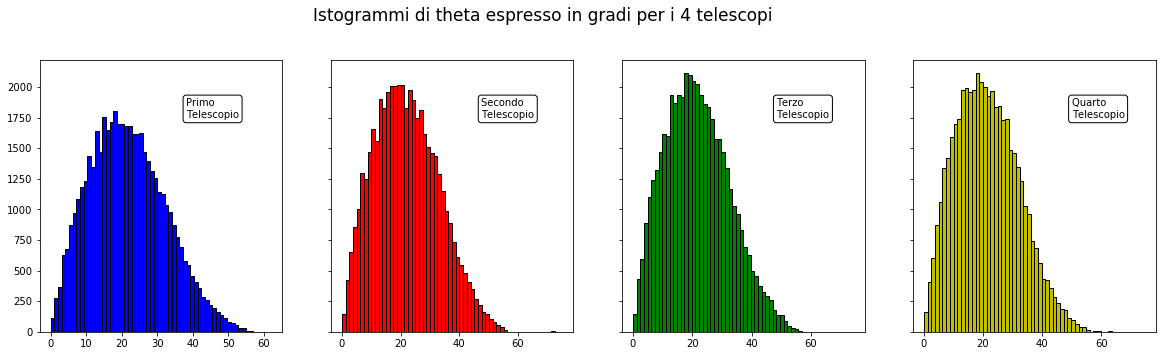

In [11]:
# Definiamo questa variabile per comodità
colonna = 'theta'

# Realizziamo lo spazio per disporre i grafici sulla stessa linea
fig, (isto1, isto2, isto3, isto4) = plt.subplots(ncols = 4, sharey = True, figsize = (20, 5))

# Stampiamo i grafici negli spazi precedentemente creati
isto1.hist(dati1[colonna], bins = 60, ec = '.00', color = 'b')
isto2.hist(dati2[colonna], bins = 60, ec = '.00', color = 'r')
isto3.hist(dati3[colonna], bins = 60, ec = '.00', color = 'g')
isto4.hist(dati4[colonna], bins = 60, ec = '.00', color = 'y')

# Diamo un titolo generale ai quattro istogrammi 
plt.text(-207, 2200, 'Istogrammi di theta espresso in gradi per i 4 telescopi\n\n', fontsize = 17)

# Mettiamo un etichetta ad ogni istogramma che ne indichi il telescopio
plt.text(-150, 1750, 'Secondo \nTelescopio', bbox={'facecolor':'w', 'boxstyle':'round'})
plt.text(-250, 1750, 'Primo \nTelescopio',bbox={'facecolor':'w', 'boxstyle':'round'})
plt.text(50, 1750, 'Quarto \nTelescopio', bbox={'facecolor':'w', 'boxstyle':'round'})
plt.text(-50, 1750, 'Terzo \nTelescopio', bbox={'facecolor':'w', 'boxstyle':'round'})

# Stampiamo il risultato sullo schermo
plt.show()


Passiamo ora al grafico degli andamenti di theta per i vari telescopi. Per fare questi grafici ci avvaleremo di due funzioni create precedentemente: linea e datigrafico.

In [ ]:
def linea(g, ntelescopio, colonna, colore, maxx, maxy, minx, assex, assey):
    
    # Definisco il grafico 
    plt.plot(g, label = 'Telescopio %d' % ntelescopio, color = colore)
    
    # Creo la leggenda del grafico
    plt.legend(loc = 'best', shadow = True, fancybox = True, title = 'Grafici di %s' % colonna, ncol = 1)
    
    # Decido le scale degli assi
    plt.axes().xaxis.set_major_locator(ticker.MultipleLocator(maxx))
    plt.axes().xaxis.set_minor_locator(ticker.MultipleLocator(minx))
    plt.axes().yaxis.set_major_locator(ticker.MultipleLocator(maxy))
    
    # Inserisco una griglia sotto i grafico
    plt.grid(True, which = 'major', axis = 'both')
    
    # Do dei nomi agli assi
    plt.xlabel(assex)
    plt.ylabel(assey)

In [91]:
def datigrafico(dati1, dati2, dati3, dati4, colonna, x):
    
    # Seleziono la parte di grafico che mi interessa
    g1 = dati1.groupby(['telescopio', dati1[colonna]//x*x]).size().unstack('telescopio') 
    g2 = dati2.groupby(['telescopio', dati2[colonna]//x*x]).size().unstack('telescopio') 
    g3 = dati3.groupby(['telescopio', dati3[colonna]//x*x]).size().unstack('telescopio') 
    g4 = dati4.groupby(['telescopio', dati4[colonna]//x*x]).size().unstack('telescopio') 
    return [g1, g2, g3, g4]

In [93]:
# Raccogliamo i dati dei vari telescopi in un unica lista
theta=datigrafico(dati1, dati2, dati3, dati4, 'theta', 2)

# Mostriamo i dati dei singoli telescopi in un unico grafico
linea(theta[0], 1, colonna, 'b', 5, 400, 1, 'Theta (gradi)', 'Conteggio')
linea(theta[1], 2, colonna, 'r', 5, 400, 1, 'Theta (gradi)', 'Conteggio')
linea(theta[2], 3, colonna, 'g', 5, 400, 1, 'Theta (gradi)', 'Conteggio')
linea(theta[3], 4, colonna, 'y', 5, 400, 1, 'Theta (gradi)', 'Conteggio')

# Limitiamo la rappresentazione del grafico a degli intervalli sugli assi
plt.xlim(0,)
plt.ylim(0,)

# Stampiamo il risultato sullo schermo 
plt.show()


Analogamente al caso appena svolto possiamo fare i grafici di phi, delta T e delta S.

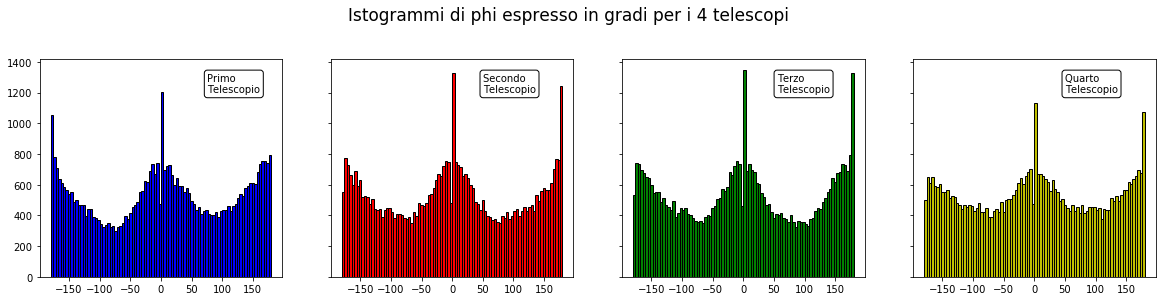

In [80]:
# Definiamo questa variabile per comodità
colonna = 'phi'

# Realizziamo lo spazio per disporre i grafici sulla stessa linea
fig, (isto1, isto2, isto3, isto4) = plt.subplots(ncols = 4, sharey = True, figsize = (20, 4))

# Stampiamo i grafici negli spazi precedentemente creati
isto1.hist(dati1[colonna], bins = 90, ec = '.00', color = 'b')
isto2.hist(dati2[colonna], bins = 90, ec = '.00', color = 'r')
isto3.hist(dati3[colonna], bins = 90, ec = '.00', color = 'g')
isto4.hist(dati4[colonna], bins = 90, ec = '.00', color = 'y')

# Diamo un titolo generale ai quattro istogrammi
plt.text(-1120, 1400, 'Istogrammi di phi espresso in gradi per i 4 telescopi\n\n', fontsize = 17)

# Mettiamo un etichetta ad ogni istogramma che ne indichi il telescopio
plt.text(-900, 1200, 'Secondo \nTelescopio', bbox = { 'facecolor': 'w', 'boxstyle': 'round' })
plt.text(-1350, 1200, 'Primo \nTelescopio', bbox = { 'facecolor': 'w', 'boxstyle': 'round' })
plt.text(50, 1200, 'Quarto \nTelescopio', bbox = { 'facecolor': 'w', 'boxstyle': 'round' })
plt.text(-420, 1200, 'Terzo \nTelescopio', bbox = { 'facecolor': 'w', 'boxstyle': 'round' })

# Stampiamo il grafico sullo schermo
plt.show()

In [85]:
# Raccogliamo i dati dei vari telescopi in un unica lista
phi=datigrafico(dati1, dati2, dati3, dati4, 'phi', 10)

# Mostriamo i dati dei singoli telescopi in un unico grafico
linea(phi[0], 1, colonna, 'b', 30, 200, 5, 'Phi (gradi)', 'Conteggio')
linea(phi[1], 2, colonna, 'r', 30, 200, 5, 'Phi (gradi)', 'Conteggio')
linea(phi[2], 3, colonna, 'g', 30, 200, 5, 'Phi (gradi)', 'Conteggio')
linea(phi[3], 4, colonna, 'y', 30, 200, 5, 'Phi (gradi)', 'Conteggio')

# Limitiamo la rappresentazione del grafico a degli intervalli sugli assi
plt.ylim(0, )
plt.xlim(-180, 180)

# Stampiamo il risultato sullo schermo 
plt.show()


In [89]:
# Definiamo questa variabile per comodità
colonna = 'deltaS'

# Realizziamo lo spazio per disporre i grafici sulla stessa linea
fig, (isto1, isto2, isto3, isto4) = plt.subplots(ncols = 4, sharey = True, figsize = (20, 4))

# Stampiamo i grafici negli spazi precedentemente creati
isto1.hist(dati1[colonna], bins = 100, ec = '.00', color = 'b')
isto2.hist(dati2[colonna], bins = 100, ec = '.00', color = 'r')
isto3.hist(dati3[colonna], bins = 100, ec = '.00', color = 'g')
isto4.hist(dati4[colonna], bins = 100, ec = '.00', color = 'y')

# Diamo un titolo generale ai quattro istogrammi
plt.text(-640, 13000, 'Istogrammi di delta S espresso in centimetri per i 4 telescopi\n\n', fontsize = 17)

# Mettiamo un etichetta ad ogni istogramma che ne indichi il telescopio
plt.text(-500, 8000, 'Secondo \nTelescopio', bbox = { 'facecolor': 'w', 'boxstyle': 'round' })
plt.text(-850, 8000, 'Primo \nTelescopio', bbox = { 'facecolor': 'w', 'boxstyle': 'round' })
plt.text(240, 8000, 'Quarto \nTelescopio', bbox = { 'facecolor': 'w', 'boxstyle': 'round' })
plt.text(-130, 8000, 'Terzo \nTelescopio', bbox = { 'facecolor': 'w', 'boxstyle': 'round' })

# Stampiamo il grafico sullo schermo
plt.show()

In [88]:
# Raccogliamo i dati dei vari telescopi in un unica lista
deltaS = datigrafico(dati1, dati2, dati3, dati4, 'deltaS', 1)

# Mostriamo i dati dei singoli telescopi in un unico grafico
linea(deltaS[0], 1, colonna, 'b', 20, 300, 5, 'Delta S', 'Conteggio')
linea(deltaS[1], 2, colonna, 'r', 20, 300, 5, 'Delta S', 'Conteggio')
linea(deltaS[2], 3, colonna, 'g', 20, 300, 5, 'Delta S', 'Conteggio')
linea(deltaS[3], 4, colonna, 'y', 20, 300, 20, 'Delta S', 'Conteggio')

# Limitiamo la rappresentazione del grafico ad un intervallo dell'asse y
plt.ylim(0, )

# Stampiamo il risultato sullo schermo
plt.show()

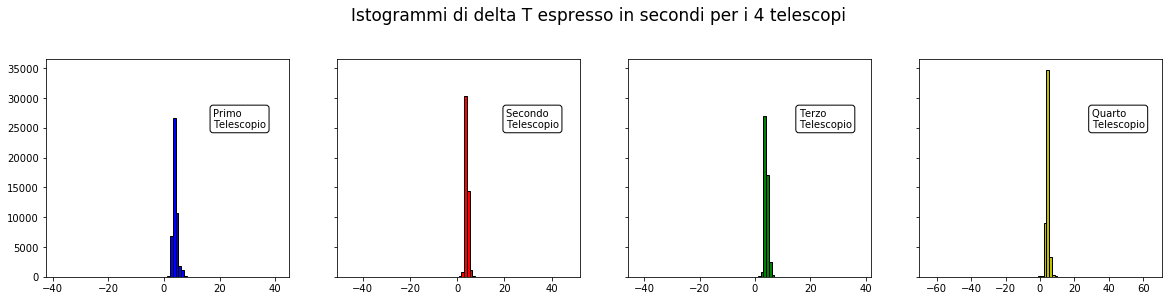

In [458]:
# Definiamo questa variabile per comodità
colonna = 'deltaT'

# Realizziamo lo spazio per disporre i grafici sulla stessa linea
fig, (isto1, isto2, isto3, isto4) = plt.subplots(ncols = 4, sharey = True, figsize = (20, 4))

# Stampiamo i grafici negli spazi precedentemente creati
isto1.hist(dati1[colonna], bins = 80, ec = '.00', color = 'b')
isto2.hist(dati2[colonna], bins = 80, ec = '.00', color = 'r')
isto3.hist(dati3[colonna], bins = 80, ec = '.00', color = 'g')
isto4.hist(dati4[colonna], bins = 80, ec = '.00', color = 'y')

# Diamo un titolo generale ai quattro istogrammi
plt.text(-400, 36000, 'Istogrammi di delta T espresso in secondi per i 4 telescopi\n\n', fontsize = 17)

# Mettiamo un etichetta ad ogni istogramma che ne indichi il telescopio
plt.text(-310, 25000, 'Secondo \nTelescopio', bbox = { 'facecolor': 'w', 'boxstyle': 'round' })
plt.text(-480, 25000, 'Primo \nTelescopio', bbox = { 'facecolor': 'w', 'boxstyle': 'round' })
plt.text(30, 25000, 'Quarto \nTelescopio', bbox = { 'facecolor': 'w', 'boxstyle': 'round' })
plt.text(-140, 25000, 'Terzo \nTelescopio', bbox = { 'facecolor': 'w', 'boxstyle': 'round' })

# Stampiamo il grafico sullo schermo
plt.show()

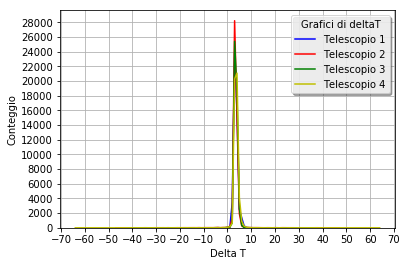

In [87]:
# Raccogliamo i dati dei vari telescopi in un unica lista
deltaT = datigrafico(dati1, dati2, dati3, dati4, 'deltaT', 1)

# Mostriamo i dati dei singoli telescopi in un unico grafico
linea(deltaT[0], 1, colonna, 'b', 10, 2000, 10, 'delta T', 'conteggio')
linea(deltaT[1], 2, colonna, 'r', 10, 2000, 10, 'delta T', 'conteggio')
linea(deltaT[2], 3, colonna, 'g', 10, 2000, 10, 'delta T', 'conteggio')
linea(deltaT[3], 4, colonna, 'y', 10, 2000, 10, 'Delta T', 'Conteggio')

# Limitiamo la rappresentazione del grafico ad un intervallo sull 'asse y
plt.ylim(0, )

# Stampiamo il risultato sullo schermo
plt.show()

Facciamo ora l'istogramma soltanto dei valori di theta per cui l'angolo phi è pari a zero.

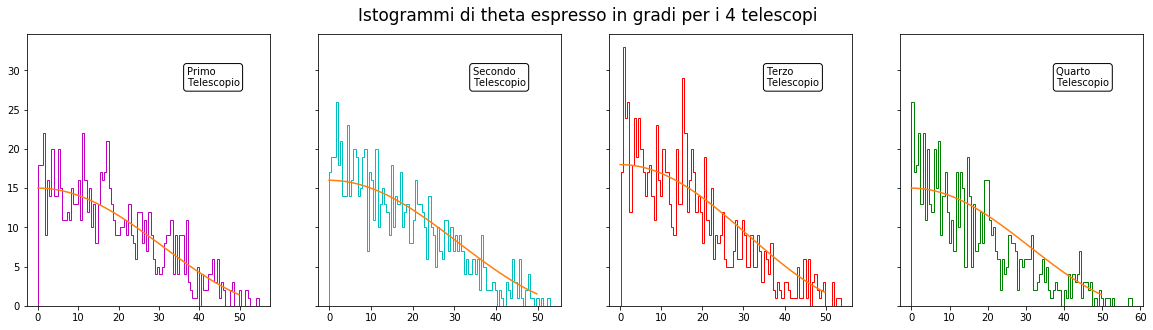

In [45]:
# Realizziamo lo spazio per disporre i grafici sulla stessa linea
fig, (isto1, isto2, isto3, isto4) = plt.subplots(ncols = 4, sharey = True, figsize = (20, 5))

t2 = np.arange(0.0, 50.0, 0.498)

# Stampiamo i grafici negli spazi precedentemente creati
isto1.hist(dati1.theta[(dati1.phi > -1) & (dati1.phi < 1)], bins = 100, histtype = 'step', ec = 'm')
isto1.plot(t2, 15*(np.cos(2*np.pi*t2)**2))
isto2.hist(dati2.theta[(dati2.phi > -1) & (dati2.phi < 1)], bins = 100, histtype = 'step', ec = 'c')
isto2.plot(t2, 16*(np.cos(2*np.pi*t2)**2))
isto3.hist(dati3.theta[(dati3.phi > -1) & (dati3.phi < 1)], bins = 100, histtype = 'step', ec = 'r')
isto3.plot(t2, 18*(np.cos(2*np.pi*t2)**2))
isto4.hist(dati4.theta[(dati4.phi > -1) & (dati4.phi < 1)], bins = 100, histtype = 'step', ec = 'g')
isto4.plot(t2, 15*(np.cos(2*np.pi*t2)**2))

# Diamo un titolo generale ai quattro istogrammi 
plt.text(-145, 31, 'Istogrammi di theta espresso in gradi per i 4 telescopi\n\n', fontsize = 17)

# Mettiamo un etichetta ad ogni istogramma che ne indichi il telescopio
plt.text(-190, 28, 'Primo \nTelescopio',bbox={'facecolor':'w', 'boxstyle':'round'})
plt.text(-115, 28, 'Secondo \nTelescopio', bbox={'facecolor':'w', 'boxstyle':'round'})
plt.text(-38, 28, 'Terzo \nTelescopio', bbox={'facecolor':'w', 'boxstyle':'round'})
plt.text(38, 28, 'Quarto \nTelescopio', bbox={'facecolor':'w', 'boxstyle':'round'})

# Stampiamo il risultato sullo schermo
plt.show()

Passiamo ora all'istogramma 2D della velocità per il quale useremo la funzione 'istogramma2d' da noi creata.

In [ ]:
def istogramma2d(x, y, axx, axy, nbin):
    
    # Definiamo l'istogramma 2D 
    plt.hist2d(x, y, bins = nbin, norm = LogNorm())
    
    # Diamo dei nomi agli assi 
    plt.xlabel(axx)
    plt.ylabel(axy)
    
    # Poniamo una leggende dei colori accanto al grafico
    plt.colorbar().ax.set_ylabel('Conteggi')

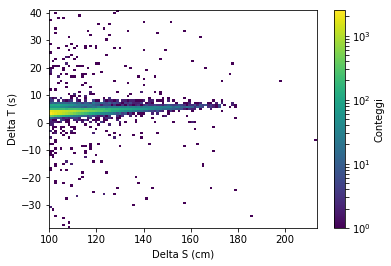

In [12]:
# Chiamiamo la funzione per creare il grafico
istogramma2d(dati1.deltaS, dati1.deltaT, 'Delta S (cm)', 'Delta T (s)', 100)

# Mostriamo il risultato sullo schermo 
plt.show()

Per il grafico della pressione faremo altretto, ma questo volta invece di porre sugli assi deltaT e deltaS, ci mettiamo la pressione e la frequenza. La pressione possiamo direttamente prenderla dal dataframe ma essendo costante all'interno di un file dovremmo prenderla da più file, mentre la frequenza dovremmo calcolarcela facendo il rapporto del numero di eventi diviso l'intervallo di tempo di esposizione.

In [17]:
%%time
# Creiamo le liste dove andremo a porre i dati della frequenza e della pressione 
frequenza = []
pressione = []

# Creiamo un prototipo dei path dei file che ci serviranno 
pathg = 'C:\\Users\\user\\Downloads\\New-BOLO-0%d\\2017-01-%02d\\BOLO-0%d-2017-01-%02d-%05d_dst.root.csv'

a = [2, 3, 4, 5, 7, 8, 9, 10]
b = [35, 33, 52, 35, 46, 76, 38, 31]

for j,x in enumerate(a):           # gli altri telescopi hanno molti più file e con 33 file ci mette 1 minuto ca.
    for i in xrange(1, b[j]):

        # Condizione messa perchè mancano dei file in alcune cartelle 
        if (i != 17 and x == 2) or (x == 3 and i != 6) or (x == 4 and i != 15):    

            # Definiamo il percorso da seguire per arrivare al file e creiamo un dataframe del file 
            fpath = pathg % (1, x, 1, x, i)
            dati = creadf(fpath)

            # Definiamo questa variabile per comodità
            indicef = len(dati.tempo)-1

            # Calcoliamo la frequenza 
            dt = distanza(dati.tempo[0], dati.tempo[indicef])*(10**-9)
            freq = (indicef+1)/dt

            # Salviamo nelle liste creata la frequenza calcolata e i dati della pressione 
            frequenza.append(freq)
            pressione.append(dati.pressione[0])



Wall time: 4min 19s


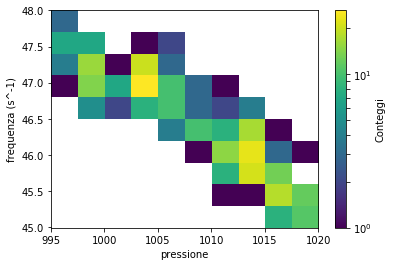

In [80]:
# Definiamo il grafico grazie alla nostra funzione 
istogramma2d(pressione, frequenza, 'pressione', 'frequenza (s^-1)', 10)

# Stampiamo il risultato sullo schermo 
plt.show()

Realizziamo ora il grafico delle coincidenze, che rappresenta l'istogramma degli intervalli di tempo tra due eventi derivanti dallo stesso raggio cosmico ma percepiti da telescopi diversi. Per determinare tali coincidenze useremo la funzione 'coincidenze', mentre per fare il grafico 'istogramma'.

In [53]:
def coincidenze(tempi1, tempi2, delta = 10**4):
    coincidenze = []
    j = 0
    for t1 in tempi1:
        tempitemp=tempi2[j:]
        i=0
        flag=True
        for t2 in tempitemp:
            if abs(t1 - t2) <= delta:
                coincidenze.append((t1, t2))
                if flag:
                    flag = False
                    j = j + i
            elif not flag:
                break
            i += 1
    return coincidenze

In [75]:
def istogramma(dati, nbin, colore, assex):
    
    # Definiamo il tipo di grafico
    plt.hist(dati, bins = nbin, ec = '.00', label = 'Grafico di theta %s' % assex, color = colore)
    
    # Poniamo una griglia sul grafico
    plt.grid(True, which = 'major', axis = 'y')
    
    # Inseriamo una leggenda
    plt.legend(loc = 'best', shadow = True, fancybox = True, title = 'Grafici di %s' % assex, ncol = 1)
    
    # Diamo un nome all'asse x
    plt.xlabel(assex)

In [30]:

pathg = 'C:\\Users\\user\\Downloads\\New-BOLO-0%d\\2017-01-02\\BOLO-0%d-2017-01-02-%05d_dst.root.csv'

for i in xrange(6):
    dati = creadf(pathg % (1, 1, i+1))
    s1 = s1.append(dati)
#s1 = s1.reset_index()

for i in xrange(6):
    dati = creadf(pathg % (4, 4, i+1))
    s4 = s4.append(dati)
s4 = s4.reset_index()

In [40]:
%%time

pathg = 'C:\\Users\\user\\Downloads\\New-BOLO-0%d\\2017-01-02\\BOLO-0%d-2017-01-02-%05d_dst.root.csv'

dati = creadf(pathg % (1, 1, 1))
s1 = dati

for j in xrange(2, 35):
    if j != 17:
        dati = creadf(pathg % (1, 1, j))
        s1 = s1.append(dati)

s1 = s1.reset_index()


Wall time: 16.3 s


In [41]:
%%time

dati = creadf(pathg % (4, 4, 1))
s4 = dati

for i in xrange(37, 76):
    dati = creadf(pathg % (4, 4, j))
    s4 = s4.append(dati)

s4 = s4.reset_index()


Wall time: 12.8 s


In [ ]:
%%time

coinc = coincidenze(s1.tempo, s4.tempo, 6*10**11)
coinc 

In [13]:
# Chiamiamo la funzione 'istogramma' per fare il grafico
istogramma(coinc, 100, 'm', 'coincidenze')

# Mostriamo il risultato
plt.show()

<type 'list'>


Passiamo ora all'istogramma degli intervalli di tempo fra due eventi consecutivi rivelati dallo stesso telescopio. Per fare questo grafico useremo la funzione 'istogramma' precedentemente descritta.

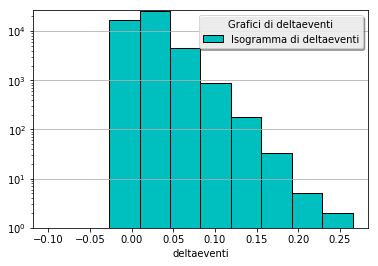

In [25]:
# Chiamiamo la funzione 
istogramma(dati1.deltaeventi, 10, 'c', 'deltaeventi')

# Decidiamo di far mostrare solo un intervallo dell'asse x 
plt.ylim(1, )

# Cambiamo la scala dell'asse, rendendo il grafico semilogaritmico
plt.axes().set_yscale("log", nonposy = 'clip')

# Mostriamo il grafico sullo schermo 
plt.show()


Concludiamo infine la nostra analisi grafica facendo i due scatter plot della frequenza. In entrambi i grafici metteremo la frequenza sull'asse y, mentre sull'asse x andrà in un grafico l'ora in cui il file è stato raccolto e nell'altro l'intervallo di tempo di esposizione. Procediamo innanzitutto ricavando i dati di cui abbiamo bisogno per fare i due grafici.

In [26]:
%%time

# Creiamo le liste dove andremo a porre i dati della frequenza e della pressione 
frequenza = []
ora = []
dtesposizione = []

# Creiamo un prototipo dei path dei file che ci serviranno 
pathg = 'C:\\Users\\user\\Downloads\\New-BOLO-0%d\\2017-01-%02d\\BOLO-0%d-2017-01-%02d-%05d_dst.root.csv'

a = [2, 3, 4, 5, 7, 8, 9, 10]
b = [35, 33, 52, 35, 46, 76, 38, 31]
    
for j,x in enumerate(a):
    for i in xrange(1, b[j]):

        # Condizione messa perchè mancano dei file in alcune cartelle 
        if (i != 17 and x == 2) or (x == 3 and i != 6) or (x == 4 and i != 15):    

            # Definiamo il percorso da seguire per arrivare al file e creiamo un dataframe del file 
            fpath = pathg % (1, x, 1, x, i)
            dati = creadf(fpath)
            
            # Calcoliamoci la frequenza, l'intervallo di tempo di esposizione e l'ora in cui sono stati raccolti i dati 
            indicef = len(dati.tempo)-1
            dt = distanza(dati.tempo[0], dati.tempo[indicef])*(10**-9)
            freq = (indicef+1)/dt
            tmedio = (dt/2.)+(dati.tempo[0]*(10**-9))
            
            # Salviamo i dati calcolati nelle rispettive liste
            ora.append((epochtodate(tmedio)).time())
            dtesposizione.append(dt/60.)
            frequenza.append(freq)

        

Wall time: 5min 16s


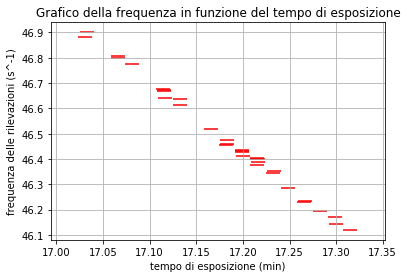

In [26]:
# Definiamo il tipo di grafico 
plt.scatter(x = dtesposizione, y = frequenza, marker = '_', s = 200, c = 'r')

# Inseriamo una griglia 
plt.grid(True, which = 'major', axis = 'both')

# Diamo un titolo al grafico 
plt.title('Grafico della frequenza in funzione del tempo di esposizione')

# Diamo dei nomi agli assi 
plt.xlabel('tempo di esposizione (min)')
plt.ylabel('frequenza delle rilevazioni (s^-1)')

# Mostriamo il risultato sullo schermo 
plt.show()

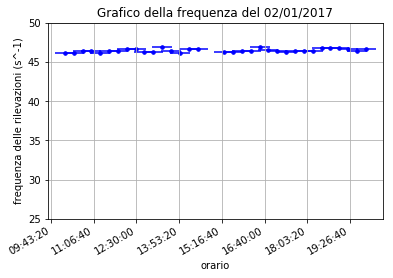

In [224]:
# Decidiamo il tipo di grafico da mostrare 
plt.scatter(ora, frequenza, marker = '_', s = 400, c = 'b')
plt.scatter(ora, frequenza, marker = '.', s = 50, c = 'b')

# Trasformiamo il tempo nel formato HH:MM
plt.gcf().autofmt_xdate()

# Inseriamo una griglia 
plt.grid(True, which = 'major', axis = 'both')

# Scegliamo di mostrare solo un intervallo di valori dell'asse y
plt.ylim(25, 50)

# Diamo un titolo al grafico
plt.title('Grafico della frequenza del 02/01/2017')

# Specifichiamo le variabili che compaiono sugli assi
plt.xlabel('orario')
plt.ylabel('frequenza delle rilevazioni (s^-1)')

# Mostriamo il grafico creato
plt.show()